(4375, 68, 2)
Total frames in video: 4375
Total landmarks: 4375


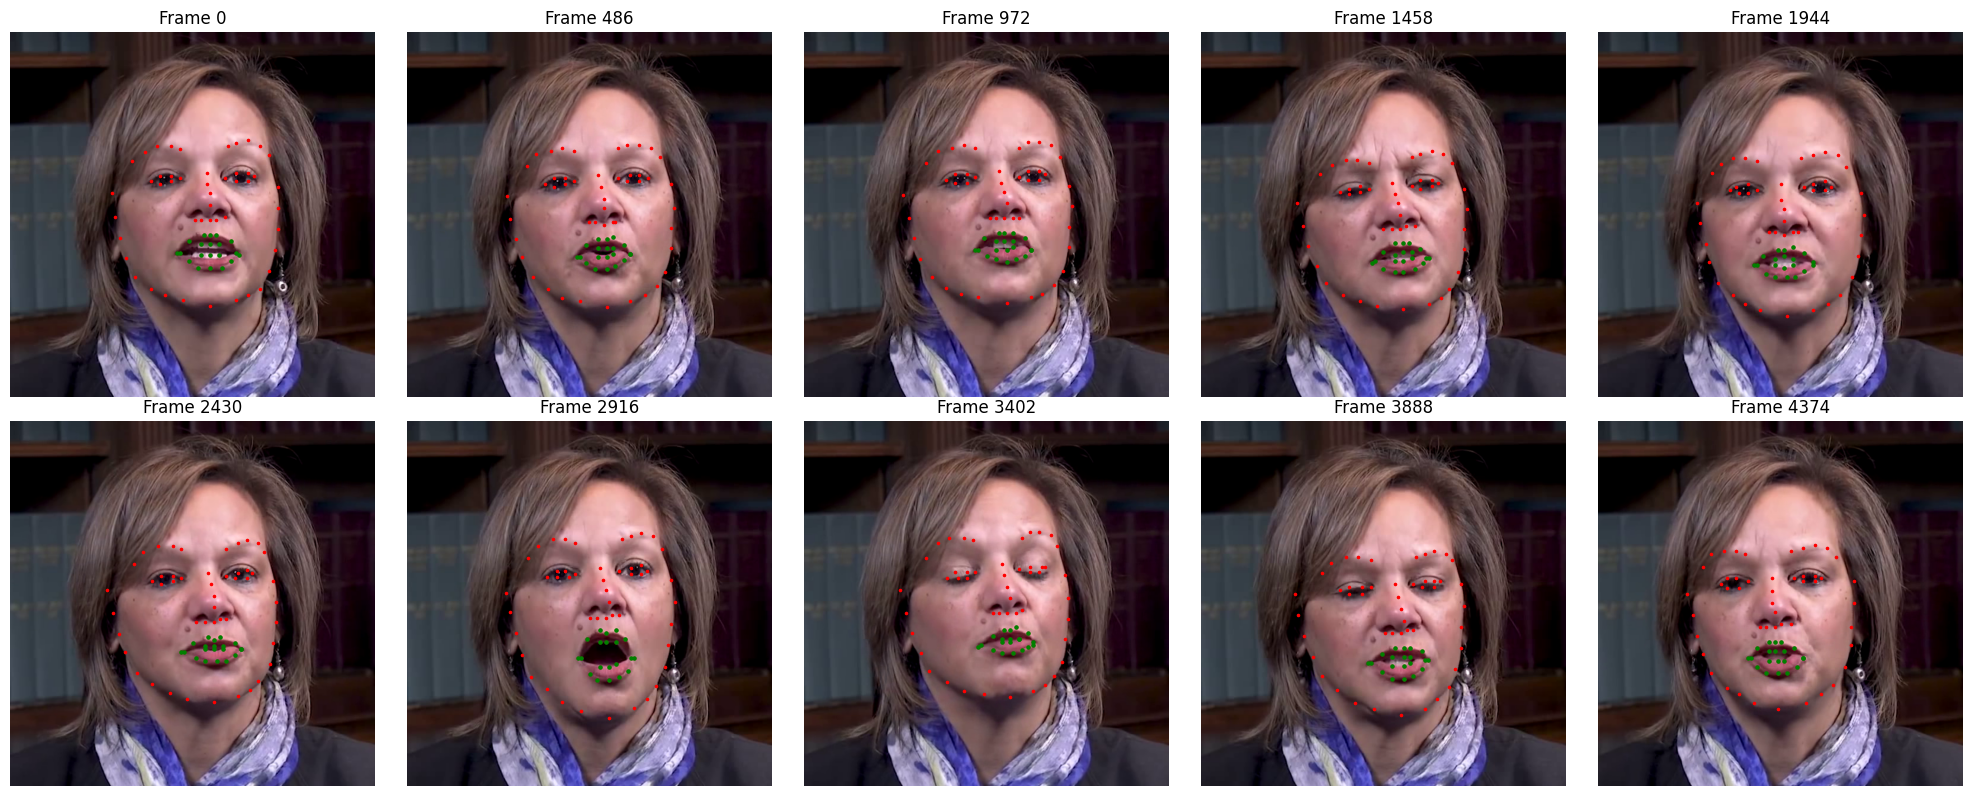

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Load video and landmarks
video_path = "../data/videos/WDA_RobinKelly_000.mp4"
landmarks_path = "../data/landmarks/WDA_RobinKelly_000.npy"

# Check if files exist
if not os.path.exists(video_path):
    raise FileNotFoundError(f"Video file not found: {video_path}")
if not os.path.exists(landmarks_path):
    raise FileNotFoundError(f"Landmarks file not found: {landmarks_path}")

# Load landmarks
landmarks = np.load(landmarks_path, allow_pickle=True)
print(landmarks.shape)

# Open video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise ValueError(f"Could not open video: {video_path}")

# Get total frames
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print(f"Total frames in video: {total_frames}")
print(f"Total landmarks: {len(landmarks)}")

# Select 10 evenly spaced frames to display
num_frames_to_show = 10
frame_indices = np.linspace(0, min(total_frames, len(landmarks)) - 1, num_frames_to_show, dtype=int)

# Create figure for displaying frames and landmarks
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.flatten()

for i, frame_idx in enumerate(frame_indices):
    # Set frame position
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    ret, frame = cap.read()
    
    if not ret:
        print(f"Could not read frame {frame_idx}")
        continue
    
    # Convert BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Get landmarks for this frame
    frame_landmarks = landmarks[frame_idx]
    
    # Display frame
    axes[i].imshow(frame_rgb)
    
    # Plot landmarks if available
    if frame_landmarks is not None:
        # Plot all landmarks
        axes[i].scatter(
            frame_landmarks[:, 0], 
            frame_landmarks[:, 1], 
            s=10, 
            c='r', 
            marker='.'
        )
        
        # Highlight mouth landmarks (indices 48-67 in standard 68-point model)
        mouth_indices = range(48, 68) if len(frame_landmarks) >= 68 else []
        if mouth_indices:
            axes[i].scatter(
                frame_landmarks[mouth_indices, 0],
                frame_landmarks[mouth_indices, 1],
                s=20,
                c='g',
                marker='.'
            )
    
    axes[i].set_title(f"Frame {frame_idx}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

# Release video
cap.release()
